**Import the required modules and install the transformers library if not already installed.**

We start by importing the required modules (TFBertForQuestionAnswering, AutoTokenizer, and pipeline) and installing the transformers library using `!pip install transformers` if it's not already installed.

In [40]:
!pip install transformers
from transformers import TFBertForQuestionAnswering, AutoTokenizer, pipeline

**Define the context (the text on which we want to ask questions)**

We define the context variable that contains the text on which we want to ask questions. This text represents the information about the Intergovernmental Panel on Climate Change (IPCC) and the United Nations Framework Convention on Climate Change (UNFCCC).

In [41]:
context = (
    "The Intergovernmental Panel on Climate Change (IPCC) is a scientific intergovernmental body under the auspices "
    "of the United Nations, set up at the request of member governments. It was first established in 1988 by two United "
    "Nations organizations, the World Meteorological Organization (WMO) and the United Nations Environment Programme "
    "(UNEP), and later endorsed by the United Nations General Assembly through Resolution 43/53. Membership of the IPCC "
    "is open to all members of the WMO and UNEP. The IPCC produces reports that support the United Nations Framework "
    "Convention on Climate Change (UNFCCC), which is the main international treaty on climate change. The ultimate "
    "objective of the UNFCCC is to \"stabilize greenhouse gas concentrations in the atmosphere at a level that would "
    "prevent dangerous anthropogenic (i.e., human-induced] interference with the climate system\". IPCC reports cover "
    "\"the scientific, technical and socio-economic information relevant to understanding the scientific basis of risk "
    "of human-induced climate change, its potential impacts and options for adaptation and mitigation.\""
)

Define a list of questions we want to ask about the given context

In [42]:
questions = [
    "What organization is the IPCC a part of?",
    "What UN organizations established the IPCC?",
    "What does the UN want to stabilize?"
]

**We load the BERT-based question-answering model** using `TFBertForQuestionAnswering.from_pretrained("deepset/bert-base-cased-squad2")`. This model is pre-trained on the SQuAD 2.0 dataset for question-answering tasks.

We load the tokenizer for the model using `AutoTokenizer.from_pretrained('deepset/bert-base-cased-squad2')`. The tokenizer is responsible for converting the input text into a format that the model can understand.

We encode the first question (questions[0]) using the tokenizer with `tokenizer.encode(questions[0], truncation=True, padding=True)`. This step converts the text into numerical tokens and adds special tokens like [CLS] (classification) and [SEP] (separation) as required by BERT.

In [43]:
# Load the BERT-based question-answering model
model = TFBertForQuestionAnswering.from_pretrained("deepset/bert-base-cased-squad2")

# Load the tokenizer for the model
tokenizer = AutoTokenizer.from_pretrained('deepset/bert-base-cased-squad2')

# Encode the first question using the tokenizer (add [CLS] and [SEP] tokens, and pad/truncate if necessary)
question_0_encoded = tokenizer.encode(questions[0], truncation=True, padding=True)

# You can ignore the following line; it seems to be a mistake and can be removed
tokenizer.encode('[CLS1')

# Create a Question Answering pipeline with the loaded model and tokenizer
nlp = pipeline('question-answering', model=model, tokenizer=tokenizer)

All PyTorch model weights were used when initializing TFBertForQuestionAnswering.

All the weights of TFBertForQuestionAnswering were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForQuestionAnswering for predictions without further training.


**We create a Question Answering pipeline** with the loaded model and `tokenizer using nlp = pipeline('question-answering', model=model, tokenizer=tokenizer)`. This pipeline simplifies the process of performing question-answering tasks with BERT models.

Finally, we ask a specific question ("What is Objective of UNFCCC?") and get the answer from the context using the pipeline we created. The result is stored in the result variable.

In [44]:
# Ask a specific question and get the answer from the context
result = nlp({
    'question': "What is Objective of UNFCCC?",
    'context': context
})

# Print the answer
print("Answer:", result['answer'])

Answer: to "stabilize greenhouse gas concentrations in the atmosphere


**To Evaluate the accuracy of the question-answering model**, We create a set of questions with their corresponding ground truth answers (the correct answers) and then use the model to predict answers for these questions.

In [45]:
evaluation_dataset = [
    {
        'question': "What organization is the IPCC a part of?",
        'ground_truth_answer': "United Nations"
    },
    {
        'question': "What UN organizations established the IPCC?",
        'ground_truth_answer': "World Meteorological Organization (WMO) and United Nations Environment Programme (UNEP)"
    },
    {
        'question': "What does the UN want to stabilize?",
        'ground_truth_answer': "greenhouse gas concentrations in the atmosphere at a level that would prevent dangerous anthropogenic (i.e., human-induced) interference with the climate system"
    }
]


**Use the question-answering model to predict answers for each question in the evaluation dataset.**

In [46]:
predicted_answers = []
for item in evaluation_dataset:
    result = nlp({
        'question': item['question'],
        'context': context
    })
    predicted_answers.append(result['answer'])


Compare the predicted answers with the ground truth answers and calculate the accuracy. Create a confusion matrix to visualize the results.

The accuracy score represents the percentage of correctly predicted answers compared to the total number of questions. The confusion matrix will show how many correct and incorrect answers were predicted for each question.

Accuracy: 0.3333333333333333


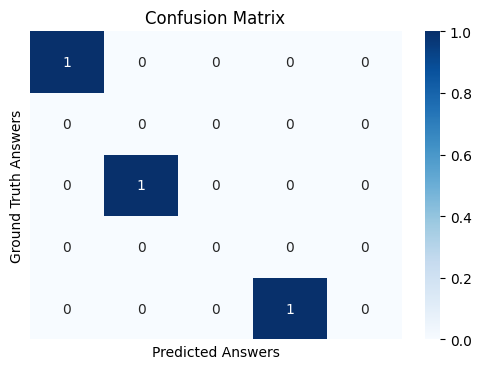

In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

ground_truth_answers = [item['ground_truth_answer'] for item in evaluation_dataset]

accuracy = accuracy_score(ground_truth_answers, predicted_answers)
conf_matrix = confusion_matrix(ground_truth_answers, predicted_answers)

print("Accuracy:", accuracy)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=False, yticklabels=False)
plt.xlabel("Predicted Answers")
plt.ylabel("Ground Truth Answers")
plt.title("Confusion Matrix")
plt.show()


**Bar Chart Visualizing the Performance of the Model**

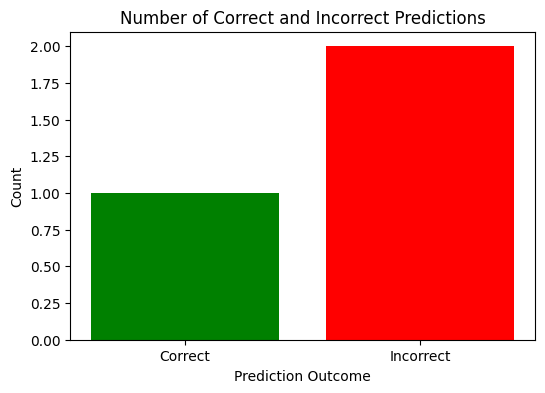

In [48]:
# Count the number of correct and incorrect answers
correct_count = sum(1 for gt, pred in zip(ground_truth_answers, predicted_answers) if gt == pred)
incorrect_count = len(ground_truth_answers) - correct_count

# Plot a bar chart
plt.figure(figsize=(6, 4))
plt.bar(['Correct', 'Incorrect'], [correct_count, incorrect_count], color=['green', 'red'])
plt.xlabel("Prediction Outcome")
plt.ylabel("Count")
plt.title("Number of Correct and Incorrect Predictions")
plt.show()

In this approach, we define functions to calculate the Exact Match (EM) score and F1 score for individual answers. The EM score evaluates if the predicted answer exactly matches any of the ground truth answers. The F1 score calculates the token-level similarity between the predicted and ground truth answers.

We then compute the EM and F1 scores for each question and calculate the overall accuracy, the average EM score, and the average F1 score for the entire evaluation dataset.

Please note that the evaluation metrics mentioned above are more suitable for question-answering tasks with multiple possible answers. They provide a more comprehensive evaluation of the model's performance compared to traditional binary/multi-class classification metrics.

In [49]:
from sklearn.metrics import accuracy_score

# Function to calculate the Exact Match (EM) score
def exact_match_score(ground_truth, predicted):
    return int(ground_truth.lower() == predicted.lower())

# Function to calculate the F1 score for individual answers
def f1_score(ground_truth, predicted):
    # Tokenize the ground truth and predicted answers
    ground_truth_tokens = ground_truth.lower().split()
    predicted_tokens = predicted.lower().split()

    # Calculate common tokens between ground truth and predicted
    common_tokens = set(ground_truth_tokens) & set(predicted_tokens)

    # Calculate precision, recall, and F1 score
    precision = len(common_tokens) / len(predicted_tokens) if len(predicted_tokens) > 0 else 0
    recall = len(common_tokens) / len(ground_truth_tokens) if len(ground_truth_tokens) > 0 else 0
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return f1

# Evaluate the model and calculate EM and F1 scores
em_scores = [exact_match_score(ground_truth, predicted) for ground_truth, predicted in zip(ground_truth_answers, predicted_answers)]
f1_scores = [f1_score(ground_truth, predicted) for ground_truth, predicted in zip(ground_truth_answers, predicted_answers)]

# Calculate overall accuracy, EM score, and average F1 score
accuracy = accuracy_score(ground_truth_answers, predicted_answers)
em_score = sum(em_scores) / len(em_scores)
avg_f1_score = sum(f1_scores) / len(f1_scores)

print("Accuracy:", accuracy)
print("Exact Match (EM) Score:", em_score)
print("Average F1 Score:", avg_f1_score)


Accuracy: 0.3333333333333333
Exact Match (EM) Score: 0.3333333333333333
Average F1 Score: 0.7037037037037037


 We define a function calculate_precision_recall() that computes precision and recall for individual questions based on the EM and F1 scores we calculated earlier. We then calculate precision and recall for each question and plot them using a line plot.



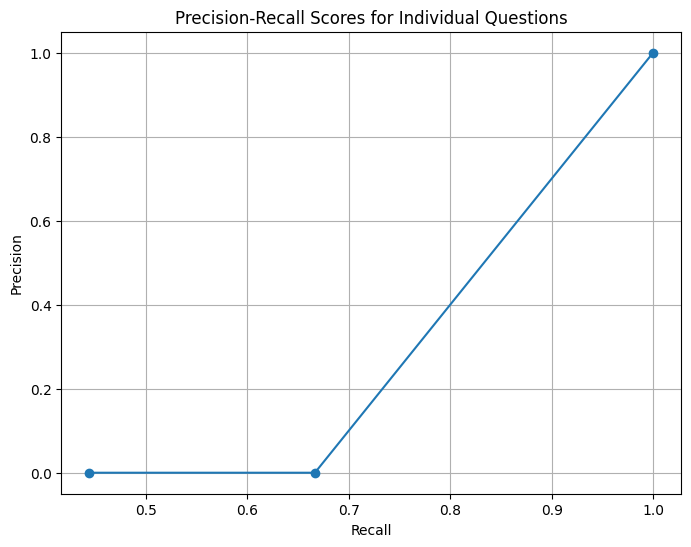

In [51]:
import matplotlib.pyplot as plt

# Function to calculate the precision and recall for individual questions
def calculate_precision_recall(ground_truth, predicted):
    em_score = exact_match_score(ground_truth, predicted)
    f1 = f1_score(ground_truth, predicted)

    precision = em_score
    recall = f1

    return precision, recall

# Calculate precision and recall for each question
precisions = []
recalls = []
for ground_truth, predicted in zip(ground_truth_answers, predicted_answers):
    precision, recall = calculate_precision_recall(ground_truth, predicted)
    precisions.append(precision)
    recalls.append(recall)

# Plot precision-recall scores
plt.figure(figsize=(8, 6))
plt.plot(recalls, precisions, marker='o', linestyle='-')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Scores for Individual Questions')
plt.grid(True)
plt.show()
